# GAN to Augument Features

### Import Libraries 

In [1]:
import os
import sys
import time
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose,LeakyReLU,BatchNormalization,  MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [3]:
# Add the path to the functions directory
sys.path.append('../functions')  # Add the path to the functions directory

## Load Dataset 

### Load Tiles

In [4]:
# import user defined function for loading tiles from datasets/tiles using functions/load_dataset.py
from load_dataset import load_images_from_directory
# specify path and call function 
directory = "../dataset/tiles"
tiles = load_images_from_directory(directory)

### Visualize Tile after loading

Number of images loaded: 99
Shape of sample image: (512, 512, 3)


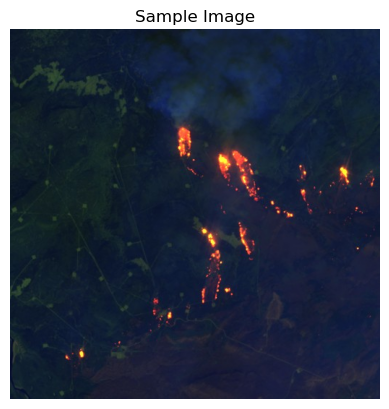

In [5]:
# confirm if tiles [] holds images, print length and plot 

# Confirm if tiles[] holds images
if len(tiles) > 0:
    # Display the number of images loaded
    print(f"Number of images loaded: {len(tiles)}")

    # Display a sample image
    sample_tile = tiles[1]

    print(f"Shape of sample image: {sample_tile.shape}")

    # Plot the sample image
    plt.imshow(cv2.cvtColor(sample_tile, cv2.COLOR_BGR2RGB))
    plt.title("Sample Image")
    plt.axis('off')
    plt.show()
else:
    print("No images loaded from the directory.")


### Normalize Tiles

In [6]:
# import user defined function for normalizing tiles from functions/tile_normalize
from tile_normalize import normalize_tiles
# call function to normalize
normalized_tiles = normalize_tiles(tiles)

### Plot a Normalized Tile

Number of Tiles loaded: 99
Shape of Tile : (512, 512, 3)


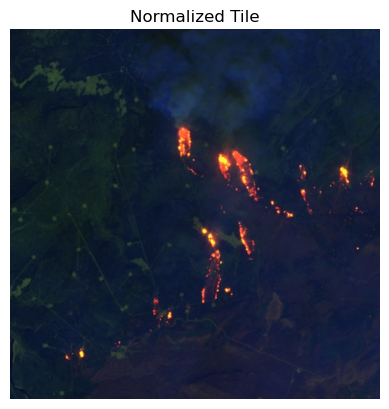

In [7]:
# confirm if tiles [] holds images, print length and plot 

# Confirm if tiles[] holds images
if len(normalized_tiles) > 0:
    # Display the number of images loaded
    print(f"Number of Tiles loaded: {len(normalized_tiles)}")

    # Display a sample image
    sample_tile = normalized_tiles[1]

    print(f"Shape of Tile : {sample_tile.shape}")

    uint8_image = (sample_tile * 255).astype(np.uint8)
    # Plot the uint8 image
    plt.imshow(cv2.cvtColor(uint8_image, cv2.COLOR_BGR2RGB))
    plt.title("Normalized Tile")
    plt.axis('off')
    plt.show()
else:
    print("No images loaded from the directory.")


###  Min Max check for tiles

In [8]:
### minium and max values for tiles
print("Normalized tiles Min:", normalized_tiles[0].min())
print("Normalized tiles Max:", normalized_tiles[0].max())
print("Normalized tiles Data type:", normalized_tiles[0].dtype)

Normalized tiles Min: 0.0
Normalized tiles Max: 1.0
Normalized tiles Data type: float64


### load Masks / Labels

In [9]:
from load_binary_masks import load_binary_masks
# specify path and call function 
mask_dir = "../dataset/masks"
masks = load_binary_masks(mask_dir)

In [10]:
print(f"masks has type {masks[0].dtype}, image is {type(masks[0])}, dimensions are {masks[0].shape}")

masks has type uint8, image is <class 'numpy.ndarray'>, dimensions are (512, 512, 1)


### Plot a Mask

Number of masks loaded: 99
Shape of sample mask: (512, 512, 1)


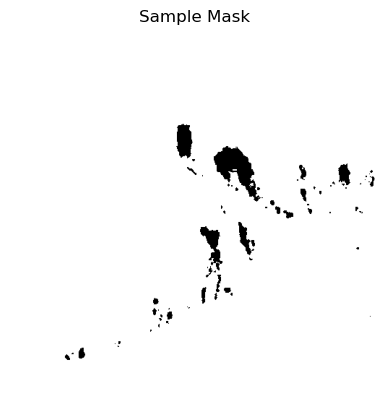

In [11]:
# Confirm if masks[] holds masks
if len(masks) > 0:
    # Display the number of masks loaded
    print(f"Number of masks loaded: {len(masks)}")

    # Display a sample image
    sample_mask = masks[1]

    print(f"Shape of sample mask: {sample_mask.shape}")

    # Plot the sample image as grayscale
    plt.imshow(sample_mask, cmap='binary')
    plt.title("Sample Mask")
    plt.axis('off')
    plt.show()
else:
    print("No images loaded from the directory.")

### Min Mask Check for Masks

In [12]:
print("Masks  Min:", masks[0].min())
print("Masks  Max:", masks[0].max())
print("Masks Data type", masks[0].dtype)

Masks  Min: 0
Masks  Max: 1
Masks Data type uint8


### Normalize Masks

In [13]:
# call function to normalize masks for consistency 
normalized_masks = normalize_tiles(masks)

In [14]:
print(f"Normalized masks has type {normalized_masks[0].dtype}, image is {type(normalized_masks[0])}, dimensions are {normalized_masks[0].shape}")

Normalized masks has type float64, image is <class 'numpy.ndarray'>, dimensions are (512, 512, 1)


In [15]:
#recheck Min Max 
# check the normalized masks
print("Normalized Masks  Min:", normalized_masks[0].min())
print("Normalized Masks  Max:", normalized_masks[0].max())
print("Normalized Masks Data type", normalized_masks[0].dtype)

Normalized Masks  Min: 0.0
Normalized Masks  Max: 1.0
Normalized Masks Data type float64


### Plot a Normalized Mask

Number of Normalized masks loaded: 99
Shape of sample Normalized mask: (512, 512, 1)


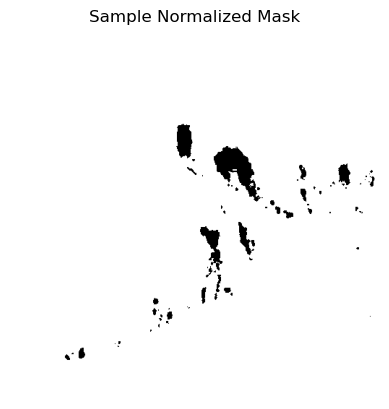

In [16]:
# Confirm if normalized_masks[] holds masks
if len(normalized_masks) > 0:
    # Display the number of masks loaded
    print(f"Number of Normalized masks loaded: {len(normalized_masks)}")

    # Display a sample image
    sample_mask = normalized_masks[1]

    print(f"Shape of sample Normalized mask: {sample_mask.shape}")

    # Plot the sample image as grayscale
    plt.imshow(sample_mask, cmap='binary')
    plt.title("Sample Normalized Mask")
    plt.axis('off')
    plt.show()
else:
    print("No images loaded from the directory.")

### Plot of Tiles, Mask, Normalized_tiles, and Normalized_masks

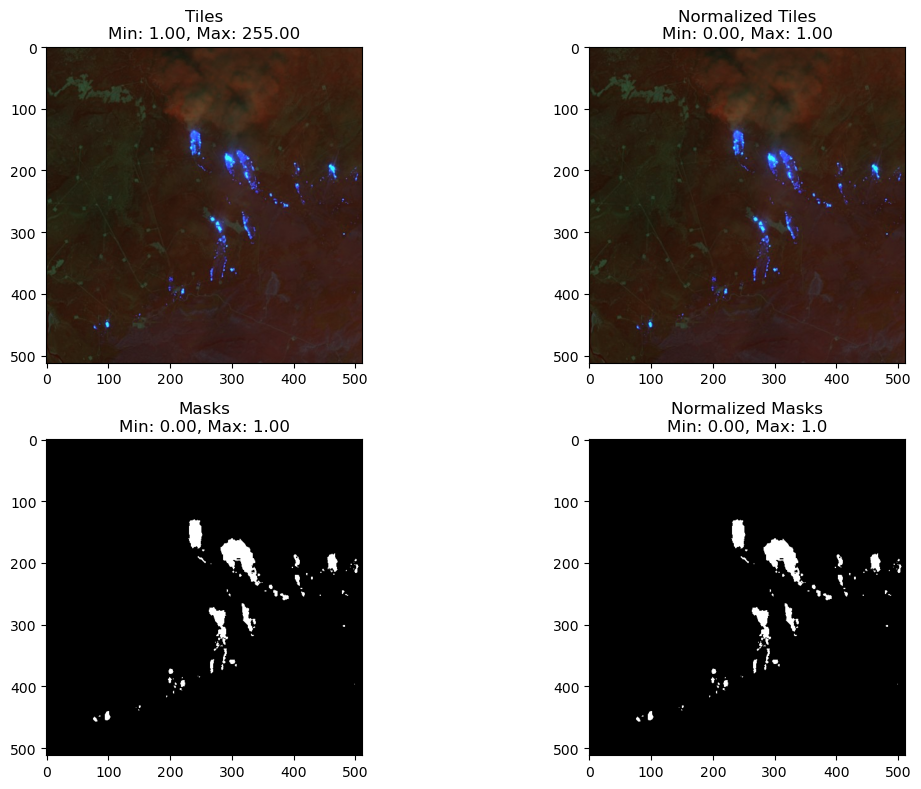

In [17]:
# Assuming you have your data loaded in variables:
# tiles, normalized_tiles, masks, normalized_masks

# Sample index to display 
index = 1 

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the 'tiles' image
axes[0, 0].imshow(tiles[index])  # Adjust cmap if not grayscale
axes[0, 0].set_title("Tiles\nMin: {:.2f}, Max: {:.2f}".format(tiles[index].min(), tiles[index].max()))

# Plot the 'normalized_tiles' image
axes[0, 1].imshow(normalized_tiles[index])
axes[0, 1].set_title("Normalized Tiles\nMin: {:.2f}, Max: {:.2f}".format(normalized_tiles[index].min(), normalized_tiles[index].max()))

# Plot the 'masks' image
axes[1, 0].imshow(masks[index], cmap='gray')
axes[1, 0].set_title("Masks\nMin: {:.2f}, Max: {:.2f}".format(masks[index].min(), masks[index].max()))

# Plot the 'normalized_masks' image
axes[1, 1].imshow(normalized_masks[index], cmap='gray')
axes[1, 1].set_title("Normalized Masks\nMin: {:.2f}, Max: {:.2}".format(normalized_masks[index].min(), normalized_masks[index].max()))

#  Adjust spacing for aesthetics
fig.tight_layout()
plt.show()


### Plot Normalized Tiles vs Normalized Masks

In [18]:
# import user defined function to plot tiles and masks from functions/iplot_masks_tiles.py 
from plot_masks_tiles import plot_masks_vs_tiles

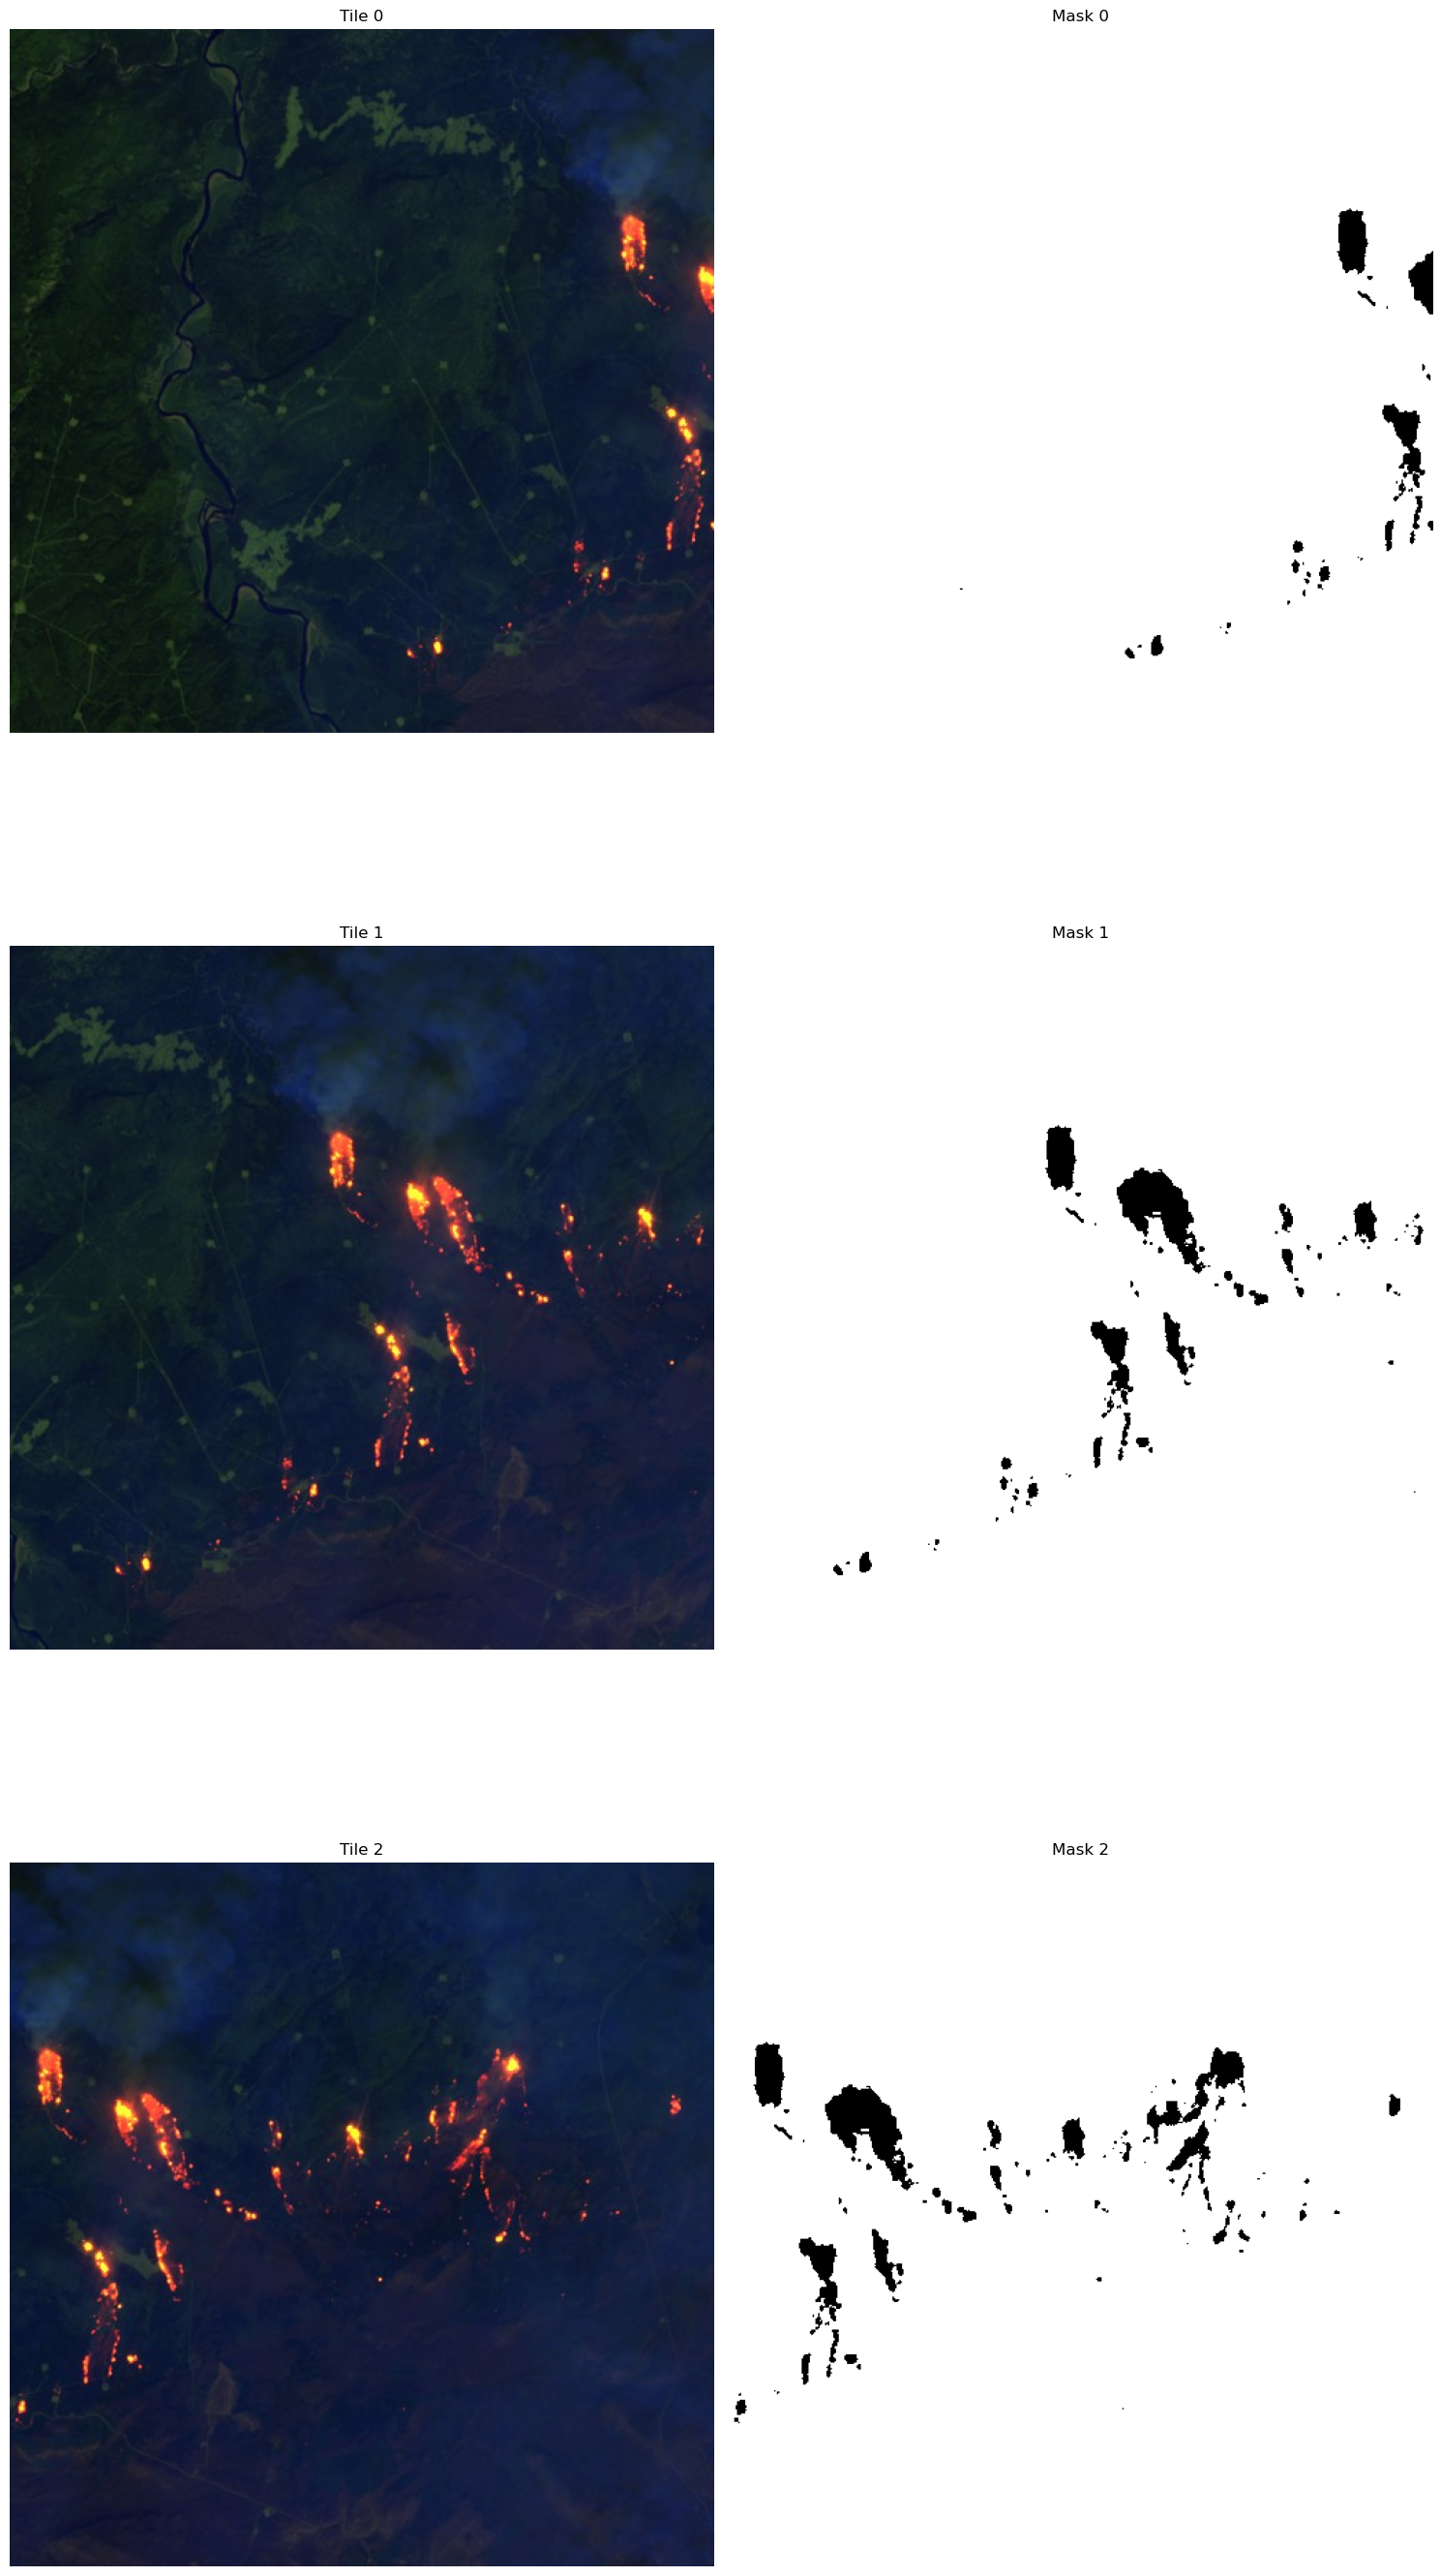

In [19]:
# Define the number of tiles to plot
num_tiles_to_plot = 3

# Plot the tiles and masks
fig, axs = plt.subplots(num_tiles_to_plot, 2, figsize=(15, 30))  # Adjust the figure size here

for i in range(num_tiles_to_plot):
    # Plot the tile (colored)
    tile_index = i  # Adjust this index based on how your tiles are loaded
    mask_index = i  # Adjust this index based on how your masks are loaded
    
    #temporarily convert normalized_tiles to unit8 to plot
    uint8_image = (normalized_tiles[tile_index] * 255).astype(np.uint8)
    # Plot the uint8 image
    axs[i, 0].imshow(cv2.cvtColor(uint8_image, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'Tile {tile_index}')
    axs[i, 0].axis('off')
    
    # Plot the mask (black and white)
    axs[i, 1].imshow(normalized_masks[mask_index], cmap='binary')
    axs[i, 1].set_title(f'Mask {mask_index}')
    axs[i, 1].axis('off')

plt.tight_layout(h_pad=0.1)  # Adjust the spacing between subplots here
plt.show()

### Type check for Tiles and Masks

In [20]:
print(f'type of Tiles {type(normalized_tiles)}')
print(f'Tiles dtype {normalized_tiles[0].dtype} ')
print(f'type of Mask {type(normalized_masks)}')
print(f'Mask dtype {normalized_masks[0].dtype} ')

type of Tiles <class 'list'>
Tiles dtype float64 
type of Mask <class 'list'>
Mask dtype float64 


### Convert Tiles and Masks to NP Arrays

In [21]:
# ## convert normalized_tiles to np arrays
np_normalized_tiles = np.asarray(normalized_tiles)

In [22]:
# ## convert normalized_masks to np arrays
np_normalized_masks = np.asarray(normalized_masks)

In [23]:
# Check for consistency before augumentation
print(f'type of Tiles {type(np_normalized_tiles)}')
print(f'Tiles dtype {np_normalized_tiles.dtype} ')
print(f"Shape of normalized tiles: {np_normalized_tiles.shape}")
print("----------------------------------------------------------------")
print(f'type of Mask {type(np_normalized_masks)}')
print(f'Mask dtype {np_normalized_masks.dtype} ')
print(f"Shape of normalized masks: {np_normalized_masks.shape}")

type of Tiles <class 'numpy.ndarray'>
Tiles dtype float64 
Shape of normalized tiles: (99, 512, 512, 3)
----------------------------------------------------------------
type of Mask <class 'numpy.ndarray'>
Mask dtype float64 
Shape of normalized masks: (99, 512, 512, 1)


### Split Data

In [24]:
# import library
from sklearn.model_selection import train_test_split

In [25]:
# split 80/20
X_train, X_val, y_train, y_val = train_test_split(
    np_normalized_tiles, np_normalized_masks, test_size=0.2, random_state=42
)

In [26]:
print(f"type of X_train {type(X_train)}") 
print(f"type of X_val {type(X_val)}") 
print(f"type of y_train {type(y_train)}") 
print(f"type of y_val {type(y_val)}")

type of X_train <class 'numpy.ndarray'>
type of X_val <class 'numpy.ndarray'>
type of y_train <class 'numpy.ndarray'>
type of y_val <class 'numpy.ndarray'>


In [27]:
# propotion of fire in the split
proportion_fire_train = np.count_nonzero(y_train.flatten() == 1)  / len(y_train.flatten())
proportion_fire_val = np.count_nonzero(y_val.flatten() == 1) / len(y_val.flatten())
 
print("Proportion of fire pixels in y_train:", proportion_fire_train)
print("Proportion of fire pixels in y_val:", proportion_fire_val)

Proportion of fire pixels in y_train: 0.03430431703977947
Proportion of fire pixels in y_val: 0.04619808197021484


### Visualize Split Values

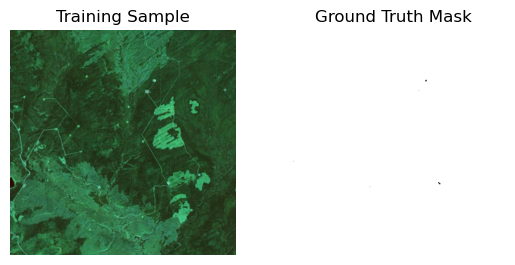

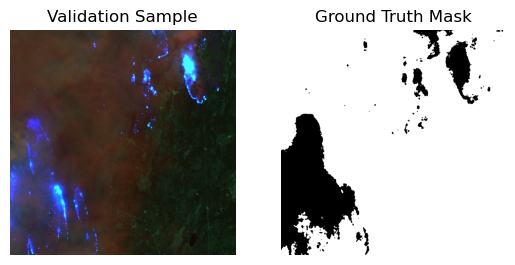

In [28]:
# Choose an index for the sample to plot
index = 7  # You can change this index to visualize different samples

# Plot the training sample
#temporarily convert X_train to unit8 to plot
uint8_image_train = (X_train[index] * 255).astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(uint8_image_train )
plt.title('Training Sample')
plt.axis('off')

# Plot the corresponding ground truth mask
plt.subplot(1, 2, 2)
plt.imshow(y_train[index], cmap='binary')  # Assuming the mask is grayscale
plt.title('Ground Truth Mask')
plt.axis('off')

plt.show()

# Plot the validation sample
plt.subplot(1, 2, 1)
#temporarily convert X_Val to unit8 to plot
uint8_image_val = (X_val[index] * 255).astype(np.uint8)
plt.imshow(uint8_image_val)
plt.title('Validation Sample')
plt.axis('off')

# Plot the corresponding ground truth mask
plt.subplot(1, 2, 2)
plt.imshow(y_val[index], cmap='binary')  # Assuming the mask is grayscale
plt.title('Ground Truth Mask')
plt.axis('off')

plt.show()


# Conditional Generative adversarial network

In [29]:
from tensorflow.keras import layers, models

### A. Generator

In [30]:
# Build generator network
def build_generator():
    input_tiles = layers.Input(shape=(512, 512, 3))
    input_masks = layers.Input(shape=(512, 512, 1))
    
    # Concatenate input_tiles and input_masks
    concatenated_input = layers.concatenate([input_tiles, input_masks])
    
    # Generator architecture
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same')(concatenated_input)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    # Increase complexity with more convolutional layers
    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
#     x = layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.LeakyReLU(alpha=0.2)(x)

    # Add more layers...

#     # Upsample back to original dimensions
#     x = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    output_tiles = layers.Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same', activation='tanh')(x)

    return models.Model(inputs=[input_tiles, input_masks], outputs=output_tiles)

### B. Discriminator

In [31]:
# Define Discriminator Network
def build_discriminator():
    input_tiles = layers.Input(shape=(512, 512, 3))
    input_masks = layers.Input(shape=(512, 512, 1))
    
    # Concatenate input_tiles and input_masks
    concatenated_input = layers.concatenate([input_tiles, input_masks])
    
    # Discriminator architecture 
    x = layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same')(concatenated_input) 
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    # Modified block (stride of 1 to maintain dimensions)
    x = layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x) 
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.2)(x)

    # ... (Add more layers if desired, carefully managing strides)

    # Potentially add a downsampling layer here if needed 

    # Final convolutional layer:
    output = layers.Conv2D(1, (3, 3), strides=(1, 1), padding='same', activation='sigmoid')(x)

    return models.Model(inputs=[input_tiles, input_masks], outputs=output)

### Loss Function

In [32]:
# Define Loss Functions
def generator_loss(fake_output):
    return tf.keras.losses.mean_squared_error(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.mean_squared_error(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.mean_squared_error(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

### Compile Model

In [33]:
# Import Adam optimizer
# from tensorflow.keras.optimizers.legacy.Adam import Adam as AdamLegacy

In [34]:
# Compile Models
generator = build_generator()
generator_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.5)
generator.compile(optimizer=generator_optimizer, loss=generator_loss)

In [35]:
discriminator = build_discriminator()
discriminator_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator.compile(optimizer=discriminator_optimizer, loss=discriminator_loss)

In [36]:
#generator summary
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 512, 512, 4)          0         ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         2368      ['concatenate[0][0]']     

In [37]:
#discriminator summary
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 concatenate_1 (Concatenate  (None, 512, 512, 4)          0         ['input_3[0][0]',             
 )                                                                   'input_4[0][0]']             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 512, 512, 64)         2368      ['concatenate_1[0][0]'] 

### Generator and discriminator Model Summary

In [39]:
## Load Model
from tensorflow.keras.models import load_model


checkpoint_path = '../checkpoints/generator_v1.keras'

# Load the model
generator.load_weights(checkpoint_path)

# Alternatively, if you only want to load the weights and not the entire model architecture
# You should ensure that the architecture of the model matches the one saved in the checkpoint
# generator.load_weights(checkpoint_path)


In [40]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
generator.compile(optimizer=generator_optimizer, loss=generator_loss)

In [41]:
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 512, 512, 4)          0         ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         2368      ['concatenate[0][0]']     

### Train Conditional GAN

In [ ]:
# ### re-size xtrain and ytrain
# # Resize the input data to match the expected input shape of the models
# X_train_resized = tf.image.resize(X_train, (512, 512))
# y_train_resized = tf.image.resize(y_train, (512, 512))

In [42]:
X_train.shape

(79, 512, 512, 3)

In [43]:
y_train.shape

(79, 512, 512, 1)

### Generate Synthetic Tiles with Fire

In [44]:
# Generate Synthetic Tiles with Fires
synthetic_tiles = generator.predict([X_val, y_val])

1/1 [==============================] - 1s 1s/step


In [82]:
print( 'The length of synthetic tiles : ',len(synthetic_tiles))
print( 'The shape of synthetic tiles : ',synthetic_tiles.shape)
print( 'The min value of synthetic tiles : ',synthetic_tiles.min())
print( 'The max value of synthetic tiles : ',synthetic_tiles.max())
print( 'The type  of synthetic tiles : ',type(synthetic_tiles))
print( 'The dtype  of  synthetic tiles : ',type(synthetic_tiles.dtype))

The length of synthetic tiles :  20
The shape of synthetic tiles :  (20, 512, 512, 3)
The min value of synthetic tiles :  -0.026116055
The max value of synthetic tiles :  0.67192936
The type  of synthetic tiles :  <class 'numpy.ndarray'>
The dtype  of  synthetic tiles :  <class 'numpy.dtype[float32]'>


In [67]:
# normalize synthetic tiles
norm_synthetic_tiles =  normalize_tiles(synthetic_tiles)

In [74]:
# convert norm_synthetic_tiles to np array
norm_synthetic_tiles = np.asarray(norm_synthetic_tiles)

In [81]:
print( 'The length of Normalized synthetic tiles : ',len(norm_synthetic_tiles))
print( 'The shape of Normalized synthetic tiles : ',norm_synthetic_tiles.shape)
print( 'The min value of Normalized synthetic tiles : ',norm_synthetic_tiles.min())
print( 'The max value of Normalized synthetic tiles : ',norm_synthetic_tiles.max())
print( 'The type  of Normalized synthetic tiles : ',type(norm_synthetic_tiles))
print( 'The dtype  of Normalized synthetic tiles : ',type(norm_synthetic_tiles.dtype))

The length of Normalized synthetic tiles :  20
The shape of Normalized synthetic tiles :  (20, 512, 512, 3)
The min value of Normalized synthetic tiles :  0.0
The max value of Normalized synthetic tiles :  1.0
The type  of Normalized synthetic tiles :  <class 'numpy.ndarray'>
The dtype  of Normalized synthetic tiles :  <class 'numpy.dtype[float64]'>


### Plot all synthetic tiles

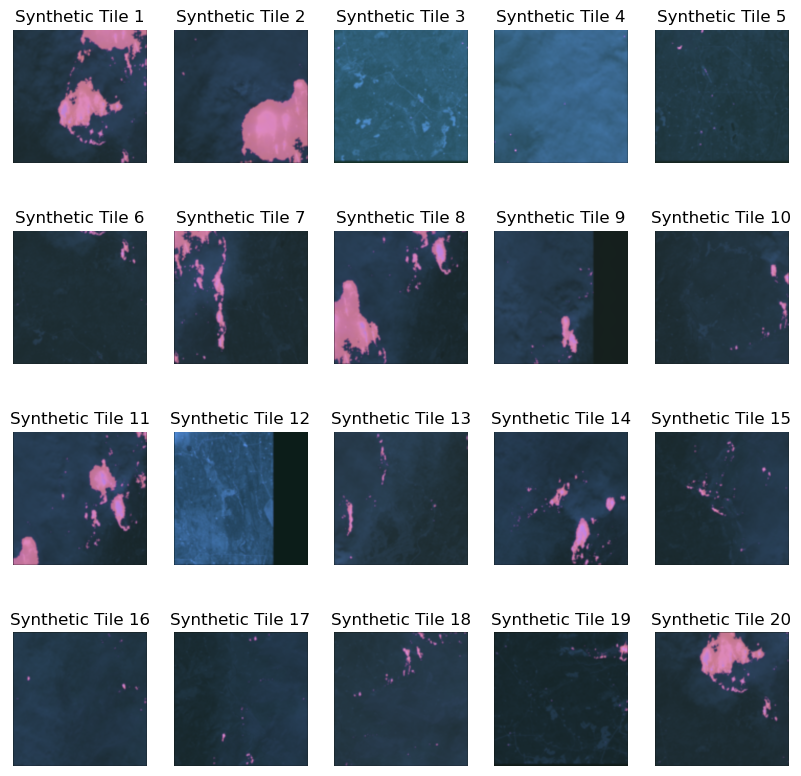

In [83]:
import matplotlib.pyplot as plt

# Plot all tiles in synthesized_tiles
num_tiles = len(norm_synthetic_tiles)
rows = int(num_tiles ** 0.5)  # Square root of num_tiles rounded down
cols = (num_tiles + rows - 1) // rows  # Ensure enough columns to display all tiles

plt.figure(figsize=(10, 10))
for i in range(num_tiles):
    plt.subplot(rows, cols, i + 1)
    uint8_image = (norm_synthetic_tiles[i] * 255).astype(np.uint8)
    plt.imshow(cv2.cvtColor(uint8_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Synthetic Tile {i+1}')
plt.show()


### Save Generated Images

In [78]:
# Define the directory to save synthetic tiles
save_dir = "../dataset/synthesized_tiles"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save synthetic tiles to the defined location
for i, tile in enumerate(norm_synthetic_tiles):
    cv2.imwrite(os.path.join(save_dir, f'synthetic_tile_{i}.png'), tile)

## Build UNET for evaluation

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
# split 80/20
X_train, X_val, y_train, y_val = train_test_split(
    normalized_tiles, normalized_masks, test_size=0.2, random_state=42
)

In [ ]:
#convert split to np array
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
# Check **
print(f"type of X_train {type(X_train)}") 
print(f"type of X_val {type(X_val)}") 
print(f"type of y_train {type(y_train)}") 
print(f"type of y_val {type(y_val)}")

### check propotion of fire

In [ ]:
proportion_fire_train = np.count_nonzero(y_train.flatten() == 1)  / len(y_train.flatten())
proportion_fire_val = np.count_nonzero(y_val.flatten() == 1) / len(y_val.flatten())
 
print("Proportion of fire pixels in y_train:", proportion_fire_train)
print("Proportion of fire pixels in y_val:", proportion_fire_val)

### plot split values before fitting

In [ ]:
import matplotlib.pyplot as plt

# Choose an index for the sample to plot
index = 1  # You can change this index to visualize different samples

# Plot the training sample
#temporarily convert X_train to unit8 to plot
uint8_image_train = (X_train[index] * 255).astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(uint8_image_train )
plt.title('Training Sample')
plt.axis('off')

# Plot the corresponding ground truth mask
plt.subplot(1, 2, 2)
plt.imshow(y_train[index], cmap='gray')  # Assuming the mask is grayscale
plt.title('Ground Truth Mask')
plt.axis('off')

plt.show()

# Plot the validation sample
plt.subplot(1, 2, 1)
#temporarily convert X_Val to unit8 to plot
uint8_image_val = (X_val[index] * 255).astype(np.uint8)
plt.imshow(uint8_image_val)
plt.title('Validation Sample')
plt.axis('off')

# Plot the corresponding ground truth mask
plt.subplot(1, 2, 2)
plt.imshow(y_val[index], cmap='gray')  # Assuming the mask is grayscale
plt.title('Ground Truth Mask')
plt.axis('off')

plt.show()


## Model configuration

### Early stopping and checkpoint

In [ ]:
# Define directory to save the checkpoints
checkpoint_dir = '../checkpoints'

# directory check
os.makedirs(checkpoint_dir, exist_ok=True)

# checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'unet_with_gan_checkpoint.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

# Define the early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

### Import loss and optimizers

In [ ]:
#import adam
from tensorflow.keras.optimizers.legacy import Adam as AdamLegacy

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy

# Create an instance of BinaryCrossentropy
bce_loss = BinaryCrossentropy()

In [ ]:
# trying dice loss function
from dice_loss import dice_loss as dls

### Import UNET model

In [ ]:
# import unet model function from functions/unet.py
from unet import unet

In [ ]:
# Compile the model with an appropriate loss function for multiclass segmentation
unet_model = unet()
unet_model.compile(optimizer=AdamLegacy(learning_rate=0.0001), loss=dls, metrics=['accuracy'])

### Model Summary

In [ ]:
unet_model.summary()

### Fit Model

In [ ]:
start_time = time.time()

unet_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

stop_time = time.time() - start_time
print(f"UNET with GAN Augumented Data training time: {stop_time / 3600:.2f} hrs")